# Projet Analyse de données 
## SORO SIELLE MARCK YVAN 
## Groupe GLF2



In [100]:
#Importation des packages nécéssaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

# Dataset
Presentation du dataset


In [215]:
data = pd.read_csv('data/Bitcoin.csv')
#afficher la tetee  du fichier
data.head(10)



,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [216]:
#afficher la taille du fichier 
data.shape


(2683, 7)

# Afficher les differents types contenues dans le fichier 

In [217]:
#Afficher les types 
print(pd.DataFrame(data.dtypes,columns =['Type']).to_markdown())

|           | Type    |
|:----------|:--------|
| Date      | object  |
| Open      | float64 |
| High      | float64 |
| Low       | float64 |
| Close     | float64 |
| Adj Close | float64 |
| Volume    | int64   |


### On doit convertir la date de type objet  pourqu' elles soient utilisables plus facilement 

In [218]:

data["Date"]= pd.to_datetime(data["Date"],infer_datetime_format=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2683 non-null   datetime64[ns]
 1   Open       2683 non-null   float64       
 2   High       2683 non-null   float64       
 3   Low        2683 non-null   float64       
 4   Close      2683 non-null   float64       
 5   Adj Close  2683 non-null   float64       
 6   Volume     2683 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 146.9 KB


In [219]:
# on verifie qu 'il n' y  pas de valeur nulles 
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [220]:
#afficher des détails statistiques
data.describe(datetime_is_numeric=True).round(2)# sans  cette aoption les dates ne seont pas reconnues 


,Date,Open,High,Low,Close,Adj Close,Volume
count,2683,2683.00,2683.00,2683.00,2683.00,2683.00,2.683000e+03
mean,2018-05-20 00:00:00,10989.90,11286.63,10662.96,11003.58,11003.58,1.459304e+10
min,2014-09-17 00:00:00,176.90,211.73,171.51,178.10,178.10,5.914570e+06
25%,2016-07-18 12:00:00,601.78,606.71,596.05,602.73,602.73,7.839140e+07
50%,2018-05-20 00:00:00,6235.03,6371.55,6093.67,6238.05,6238.05,4.999240e+09
75%,2020-03-20 12:00:00,10316.64,10495.61,10067.54,10317.94,10317.94,2.445092e+10
max,2022-01-20 00:00:00,67549.73,68789.62,66382.06,67566.83,67566.83,3.509679e+11
std,NaN,15902.62,16331.95,15408.07,15908.16,15908.16,2.008458e+10


In [232]:
#On rajoute une Colonne qui contient les nom des journées 
data["Jours"]=data['Date'].dt.day_name()

### On va produire un graphique qui affiche le nombre d' occurences de chaque Jours dans le DataSet 


c:\Users\Yvan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



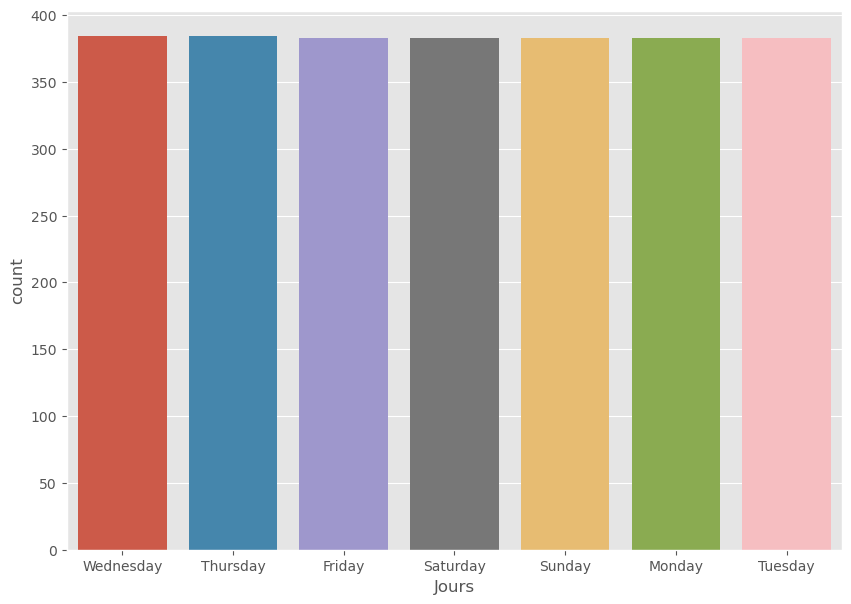

In [234]:

plt.figure(figsize=(10,7))
sns.countplot(data["Jours"])
plt.show()

In [242]:
# On va donc effectuer un regroupement sur les différents jours 

Jour =data.groupby("Jours")["Open","High","Low","Close"].mean().round(2)

Jour

C:\Users\Yvan\AppData\Local\Temp\ipykernel_7300\1439554874.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Open,High,Low,Close
Jours,,,,
Friday,10930.14,11251.86,10577.70,10966.16
Monday,11005.05,11333.88,10646.39,11022.63
Saturday,10966.88,11224.61,10721.68,11000.83
Sunday,10999.47,11240.57,10697.10,11005.38
Thursday,11024.74,11328.01,10682.49,11004.80
Tuesday,11023.72,11300.83,10672.63,11002.25
Wednesday,10979.24,11326.41,10642.71,11022.97


<AxesSubplot:xlabel='Jours'>

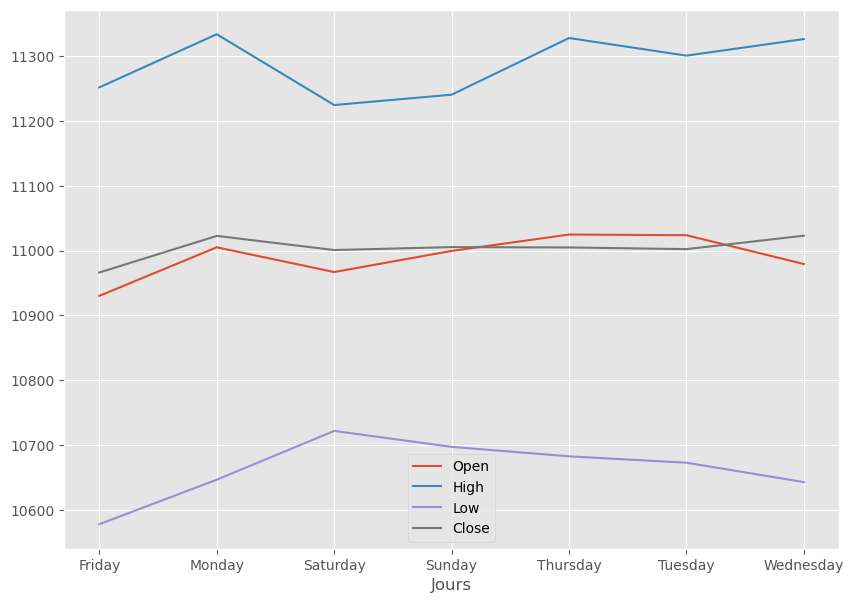

In [238]:
#on genere un graphique 
Jour.plot(figsize=(10,7))

# Nous pouvons constater que les jours où le valeur du bitcoin est élévé sont le Samedi et le Dimanche 

In [240]:
#On va generer un graphique qui montre l' evolution des cours de chaque jours en fonction des années 

px.line(data, x="Date",y="Open",color="Jour")

Le prix subissent une croissance au fil des années ,Par contre il n' y a pas de changement pertinent selon des jours.
Lea chute du prix entre 2021 et 2022 doit être au corona.

In [241]:
px.scatter_matrix(data,color="Jour")

# Conclusion
Nous avons des données sur la valeur de  Bitcoin sur un certain nombre d'années, et après avoir effectué quelques analyses, nous voyons les résultats
La valeur la plus basse pour l'ouverture sera les samedis et dimanches / en raison des vacances.

L'augmentation de la valeur au fil des ans à un niveau élevé - indique l'intérêt pour les clients numériques et leur valeur augmente et les gens en entendent davantage parler .

Les faibles valeurs entre 2021 et 2022 peuvent être dues au corona.